<a href="https://colab.research.google.com/github/Hainguyendangduc/PythonForDataAnalysis/blob/main/DAP_W13_Time_series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **Time Series Analysis in Python**


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


## **Import data** 

In [ ]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/AirPassengers.csv")
    df.head()
    df.columns = ['date','#passengers']
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    return df

df = get_df()
df.head(10)

,date,#passengers,year,month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5
5,1949-06-01,135,1949,6
6,1949-07-01,148,1949,7
7,1949-08-01,148,1949,8
8,1949-09-01,136,1949,9
9,1949-10-01,119,1949,10


## **Visualize the Time Series**

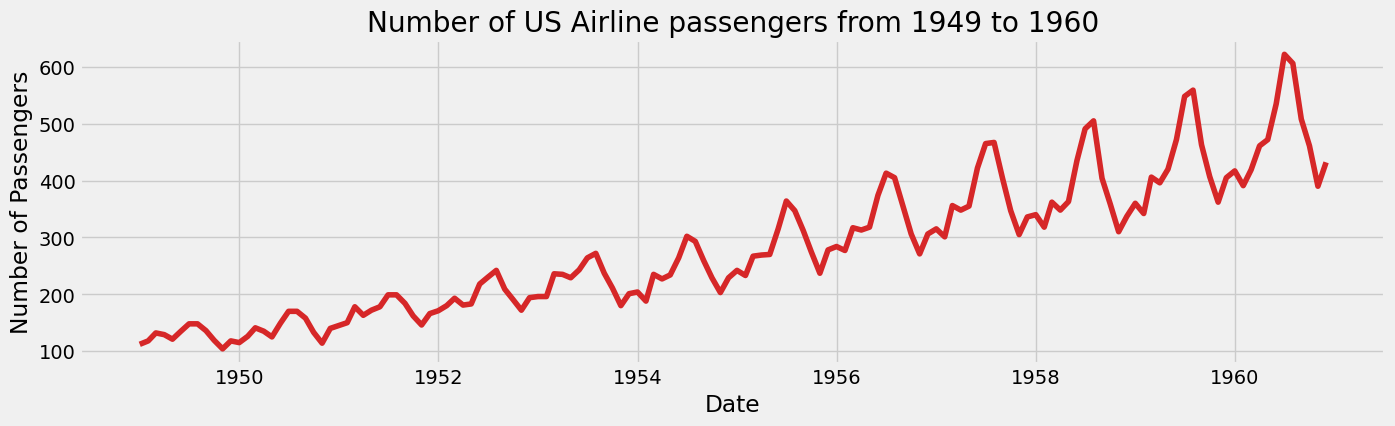

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['date'], y=df['#passengers'], title='Number of US Airline passengers from 1949 to 1960', color="tab:red")

- Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

### Seasonal Plot of a Time Series


In [ ]:
df2 = df.pivot(index='month', columns='year', values='#passengers')
df2.head(12)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472
6,135,149,178,218,243,264,315,374,422,435,472,535
7,148,170,199,230,264,302,364,413,465,491,548,622
8,148,170,199,242,272,293,347,405,467,505,559,606
9,136,158,184,209,237,259,312,355,404,404,463,508


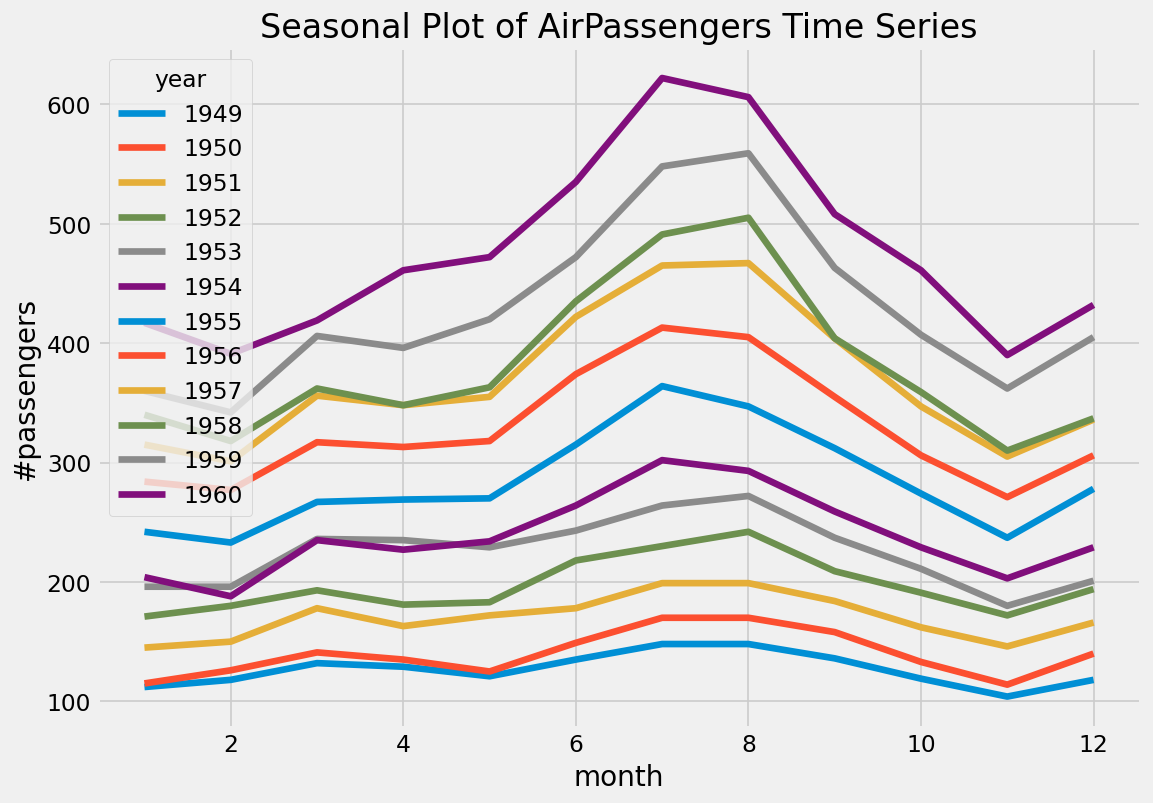

In [ ]:
df2.plot()
plt.title("Seasonal Plot of AirPassengers Time Series", fontsize=20)
plt.ylabel("#passengers")
plt.show()

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

we can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

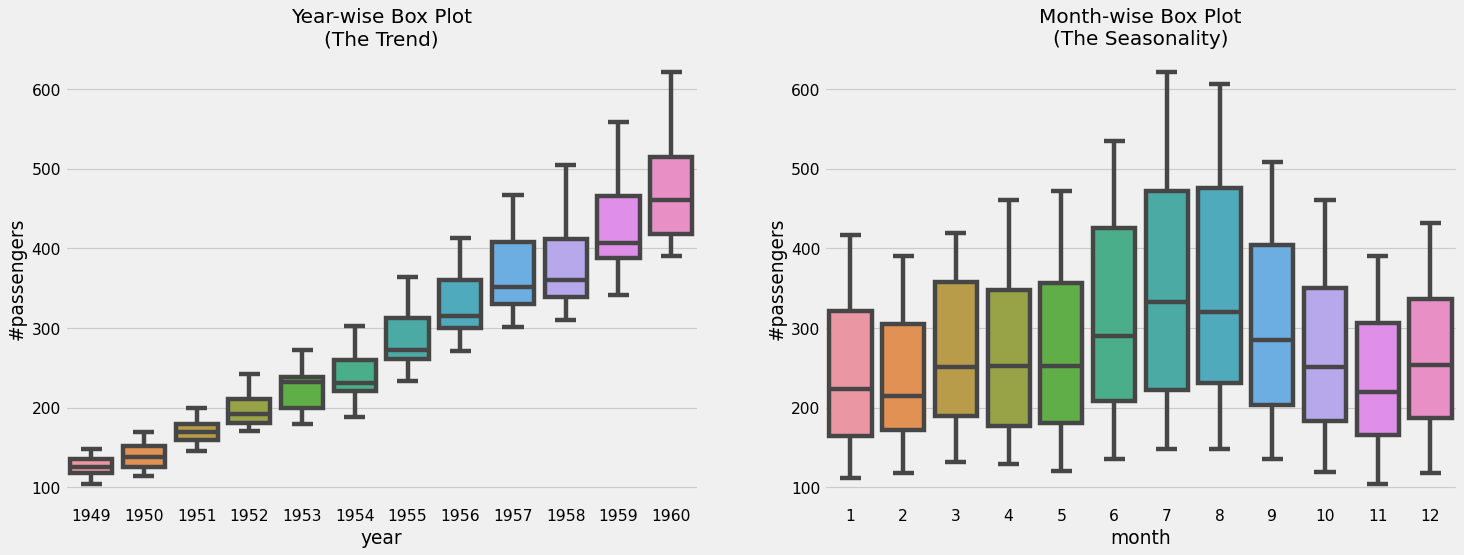

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='#passengers', data=df, ax=axes[0])
sns.boxplot(x='month', y='#passengers', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

- The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of 6 to 9 clearly has higher number of passengers, which can be attributed to the holiday travelling season.


# Modelling using statstools

## Correlation

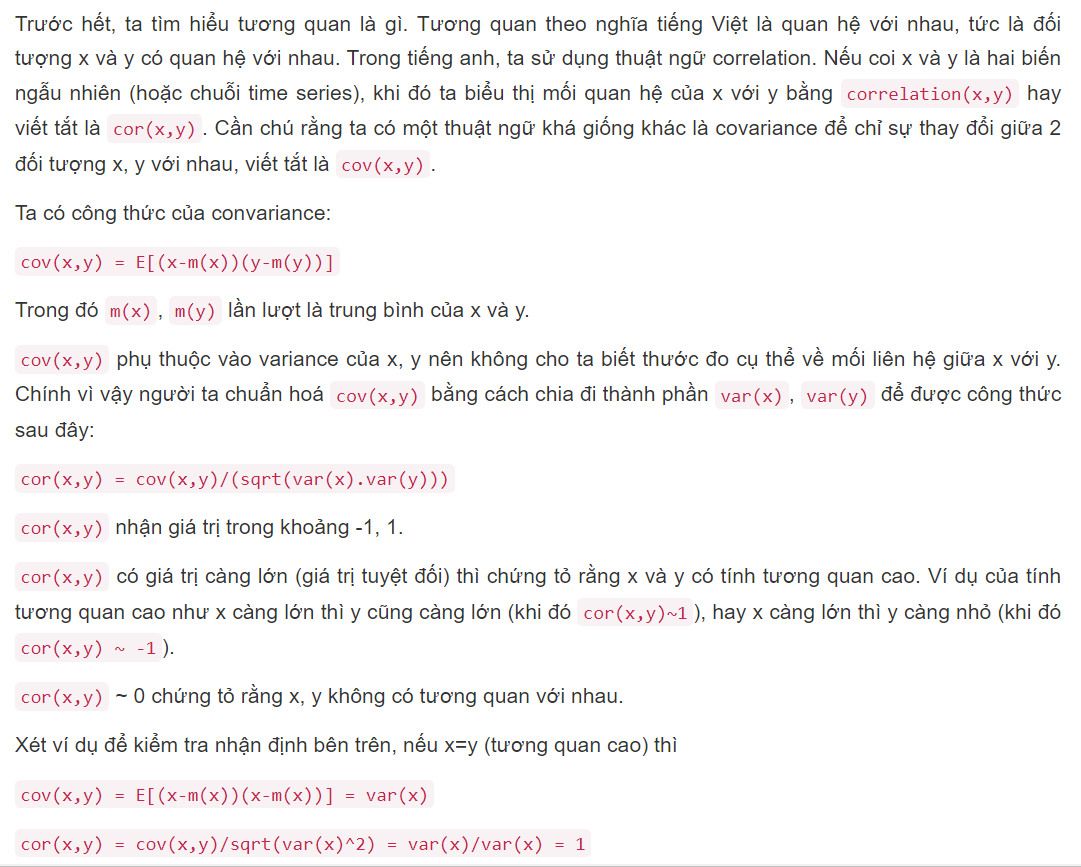

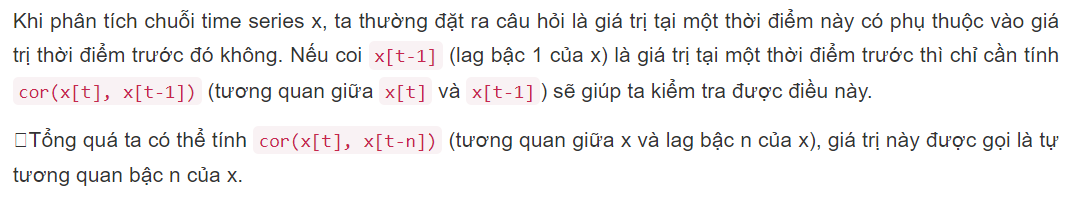


In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = get_df()
dataset = df['#passengers']
dataframe = pd.concat([dataset.shift(1), dataset], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.960195
t+1  0.960195  1.000000


## Autocorrelation Plots

We can plot the correlation coefficient for each lag variable.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

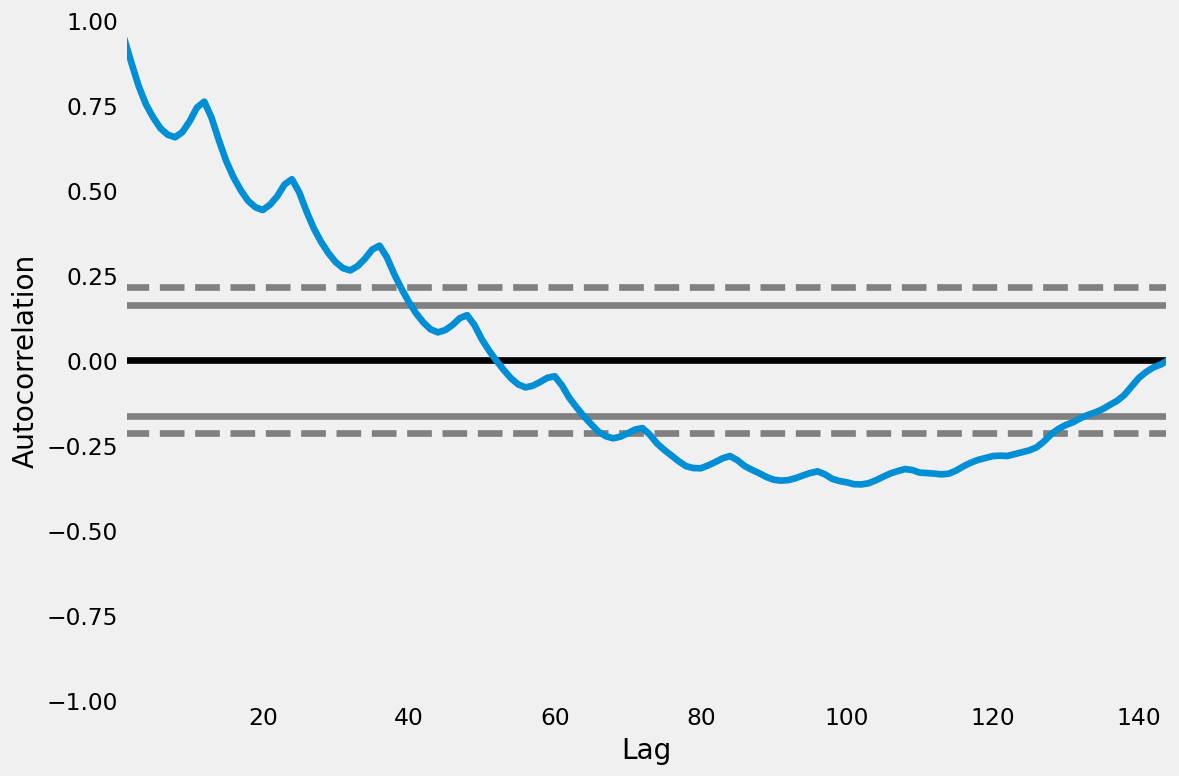

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset)

The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot.

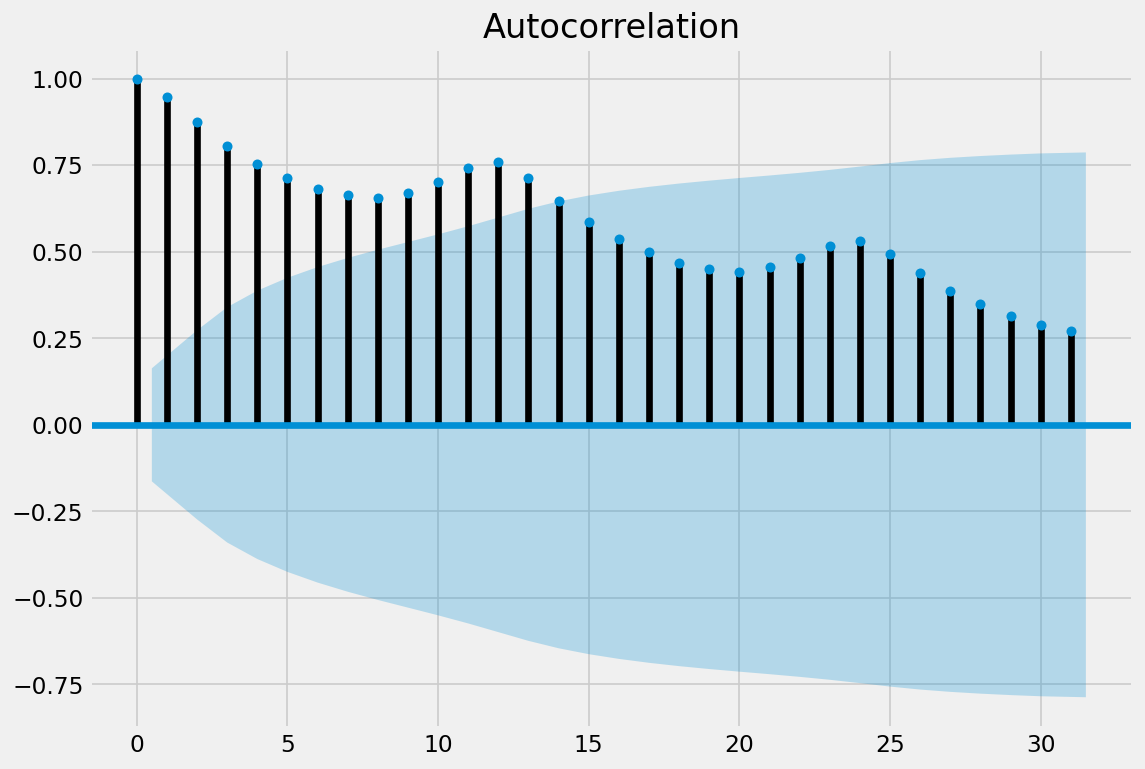

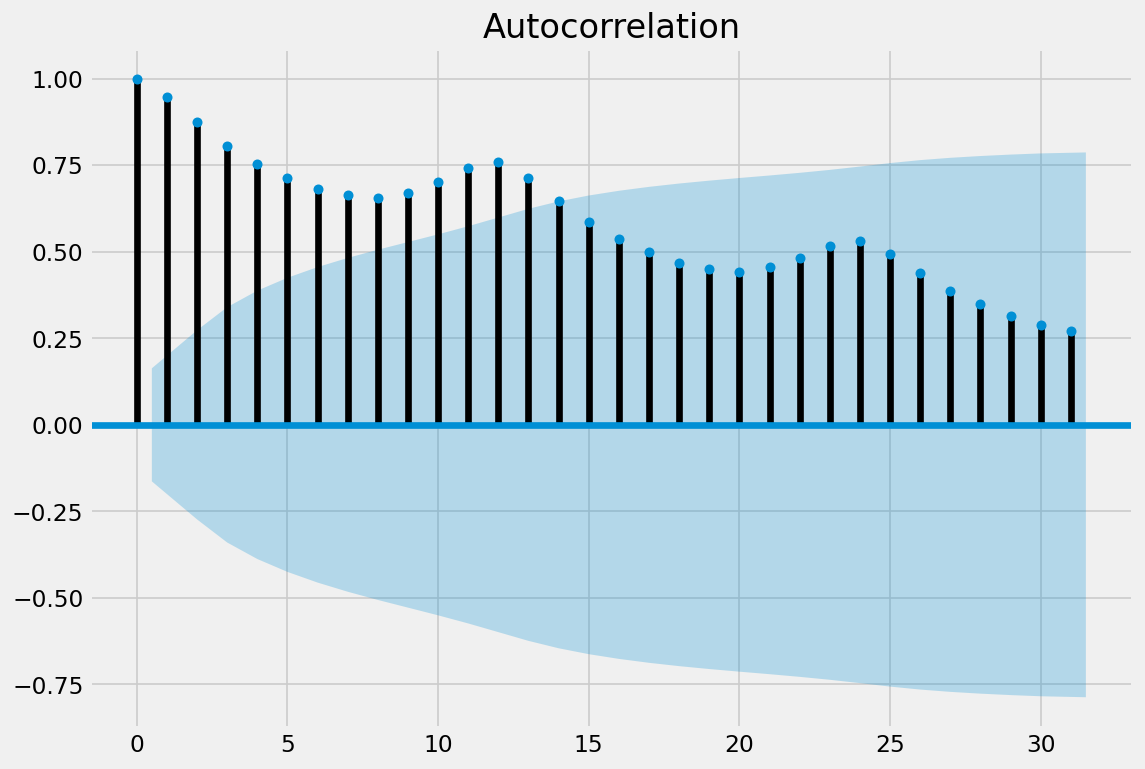

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=31)

It shows a strong positive correlation (0.96) between the observation and the lag=1 value.

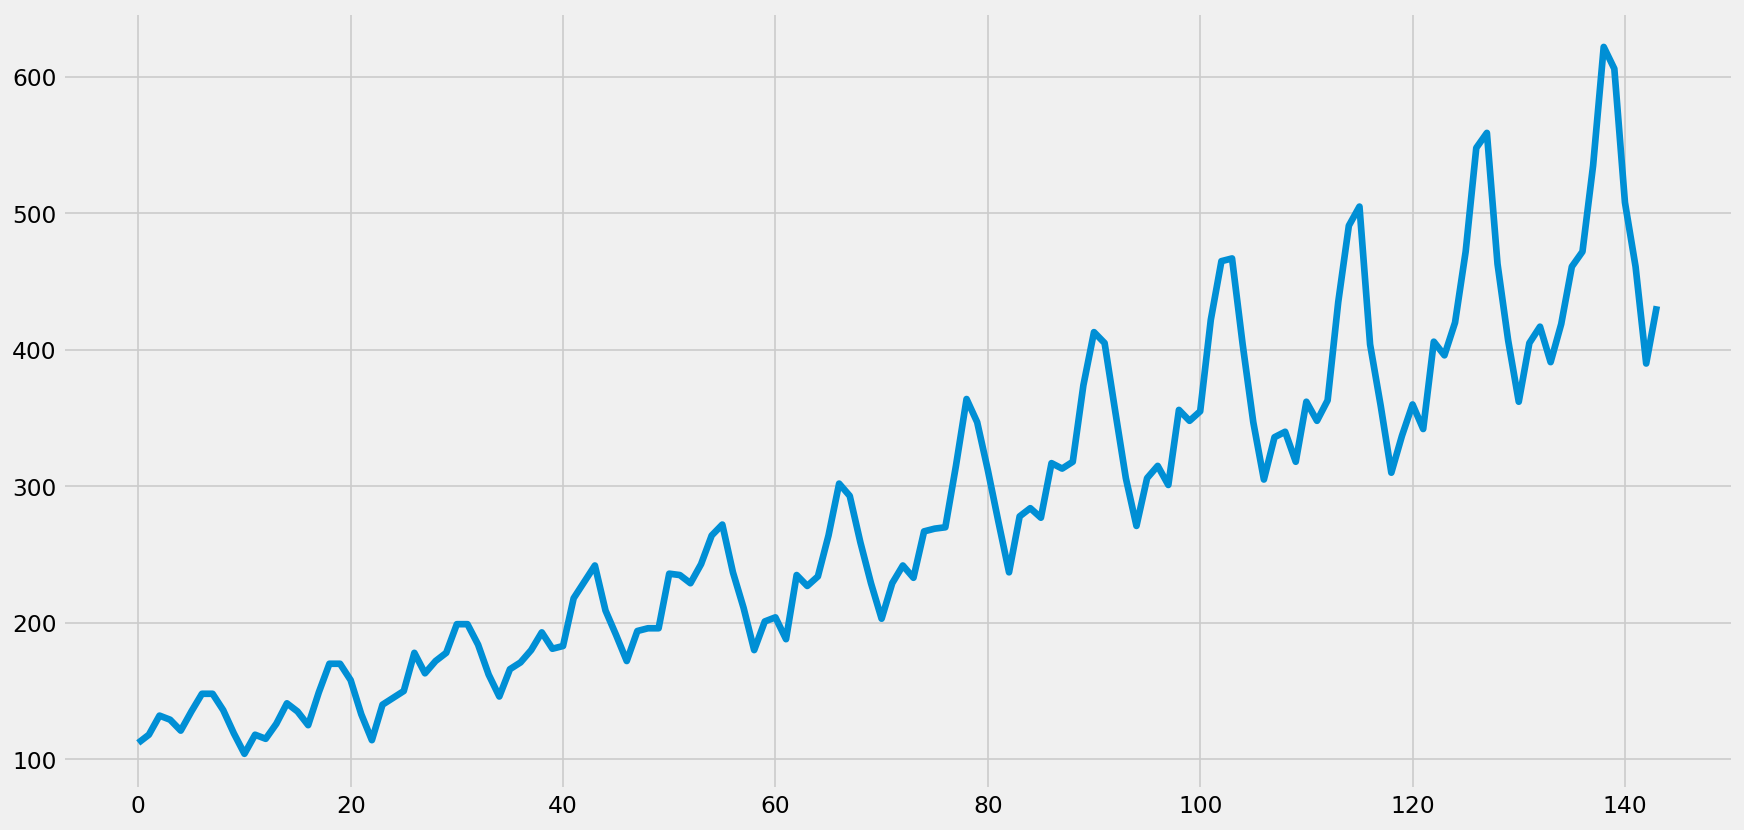

In [ ]:
df = get_df()
plt.figure(figsize=(16,8))
plt.plot(df['#passengers'])

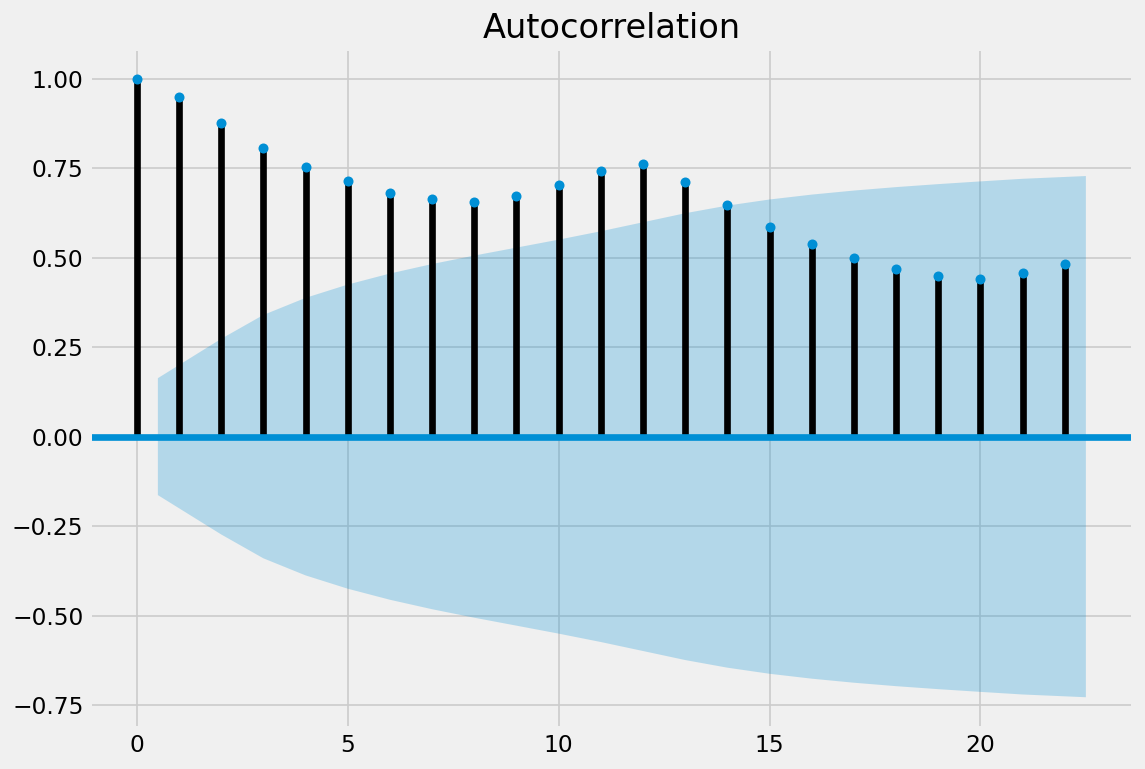

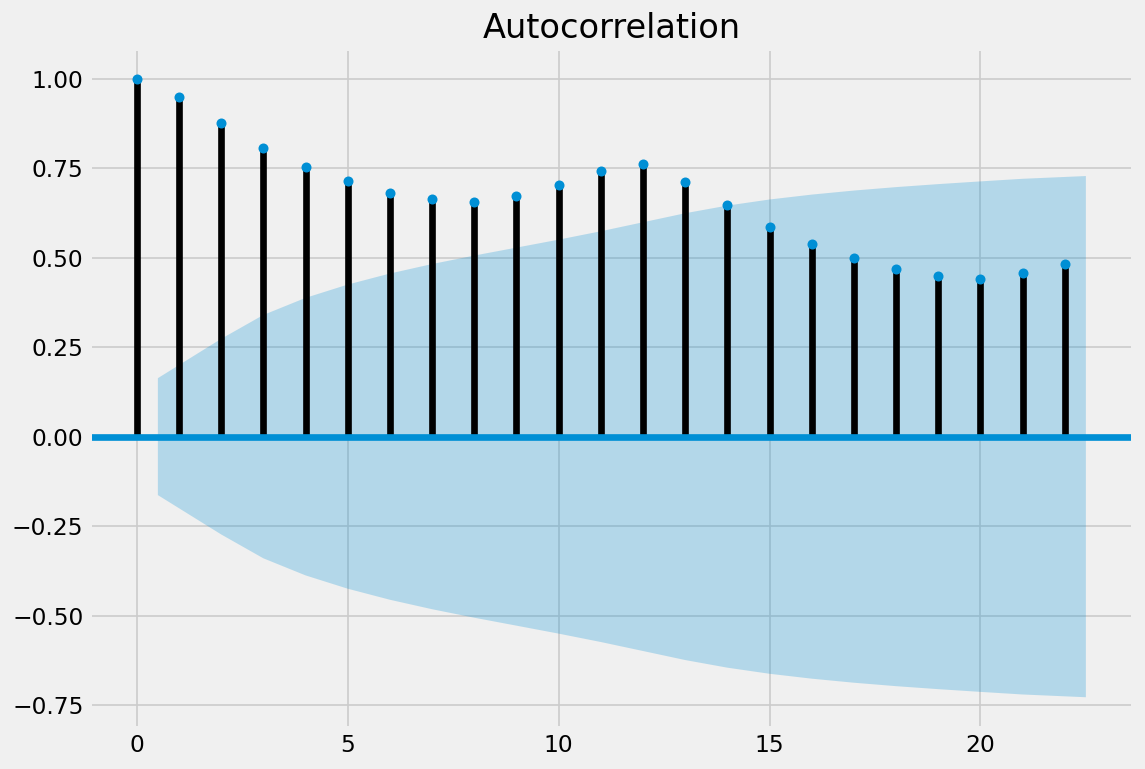

In [ ]:
plot_acf(df['#passengers'])

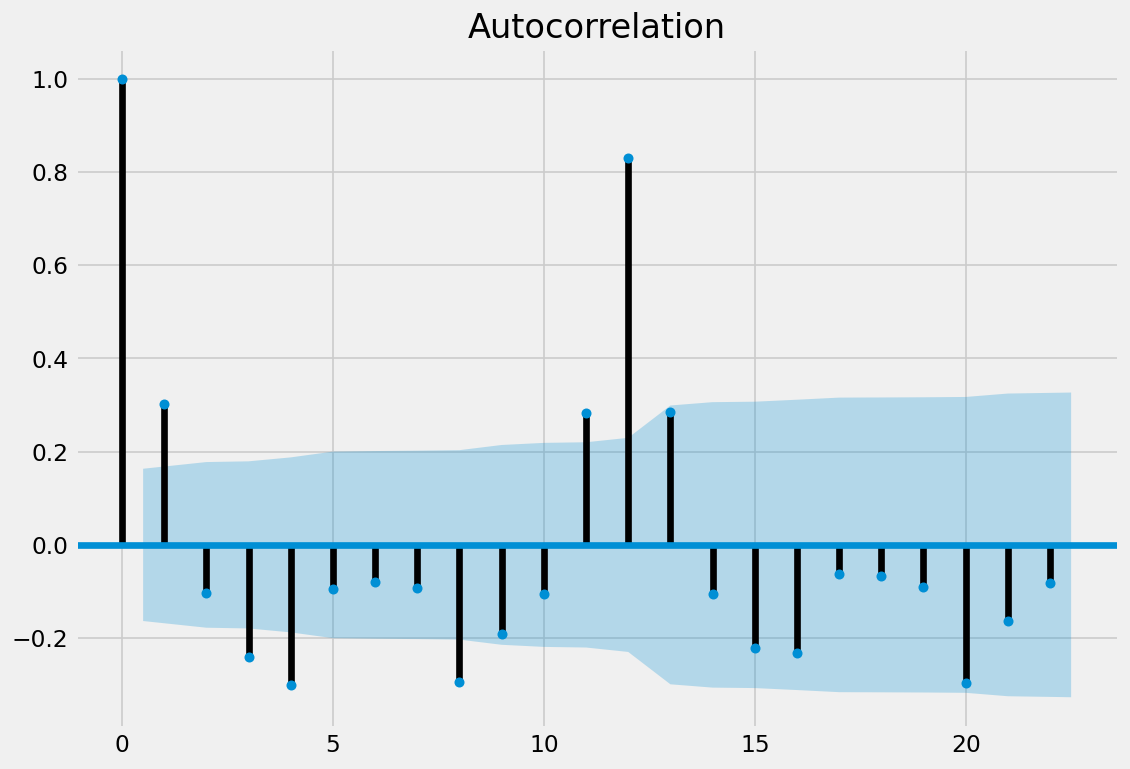

In [ ]:
# First Order Differencing
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)

plot_acf(df['#passengers_diff1'])
dataset = df['#passengers_diff1'].values

## White noise
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

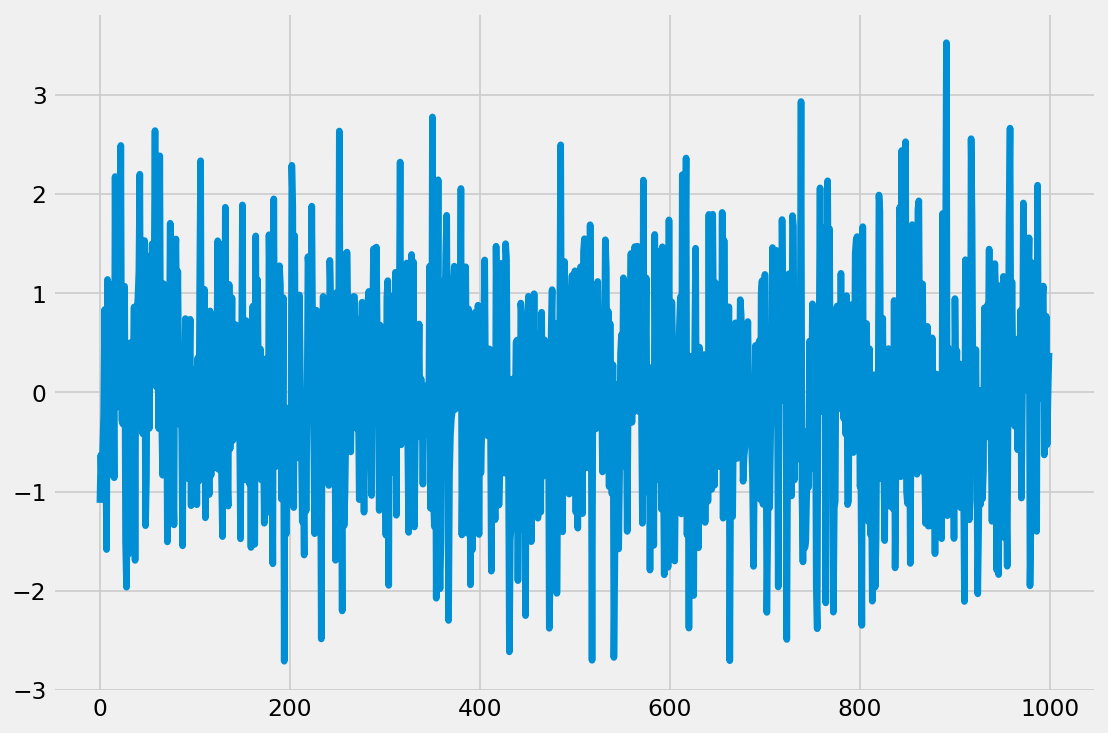

In [ ]:
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

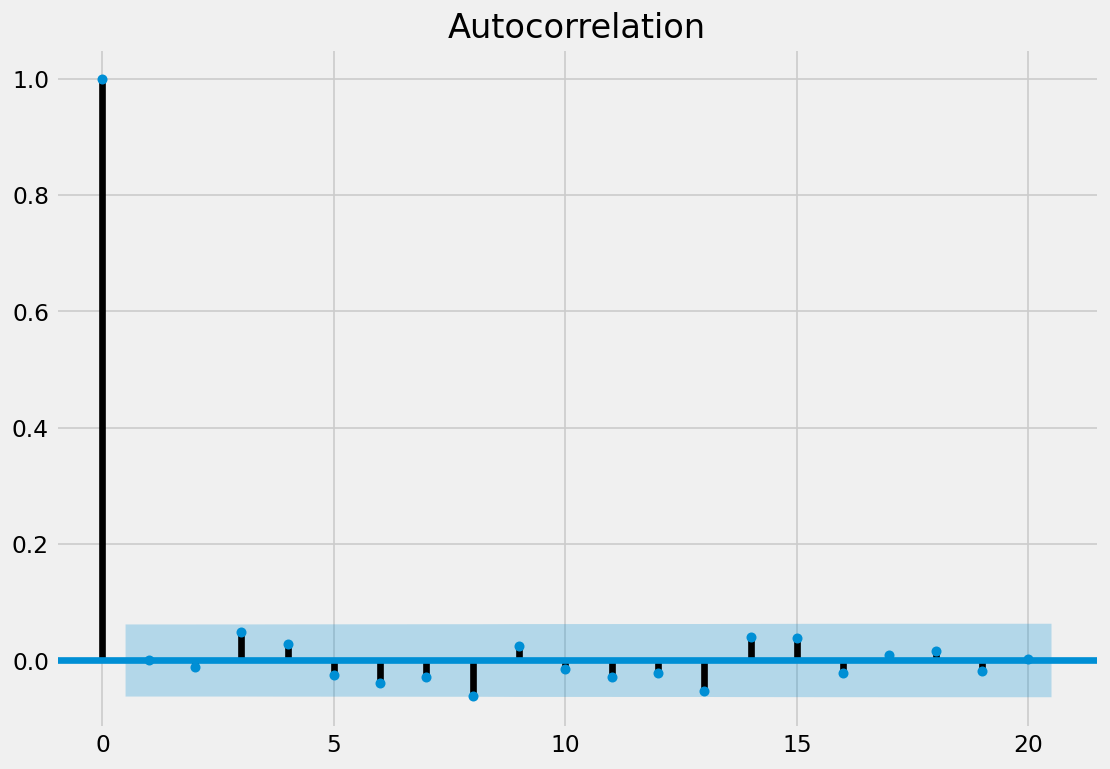

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise, lags=20)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## Random Walk
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 


Regression test for random walk 

#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>

Test:

- H<sub>0</sub>: β = 1 (This is a random walk)
- H<sub>1</sub>: β < 1 (This is not a random walk)
<br>

Dickey-Fuller Test:

- H<sub>0</sub>: β = 0 (This is a random walk)
- H<sub>1</sub>: β < 0 (This is not a random walk)

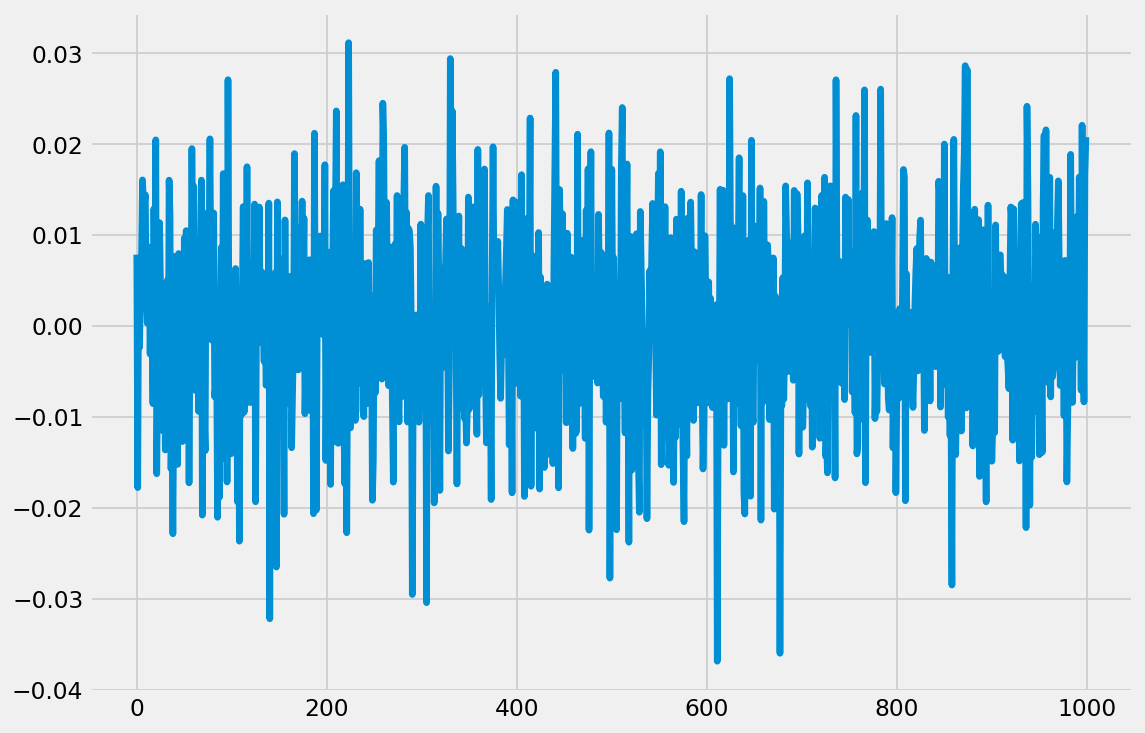

In [ ]:
random_walk = np.random.normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

## AR (Autogressive) model

The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation (or recurrence relation which should not be confused with differential equation).



# Mục mới

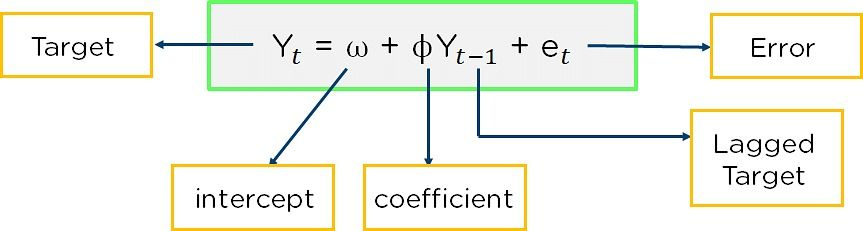

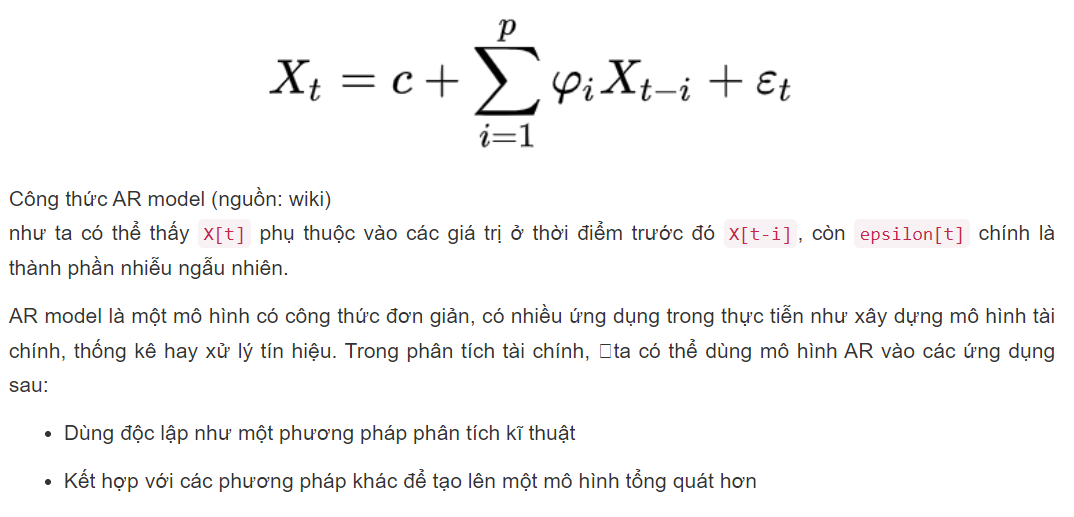

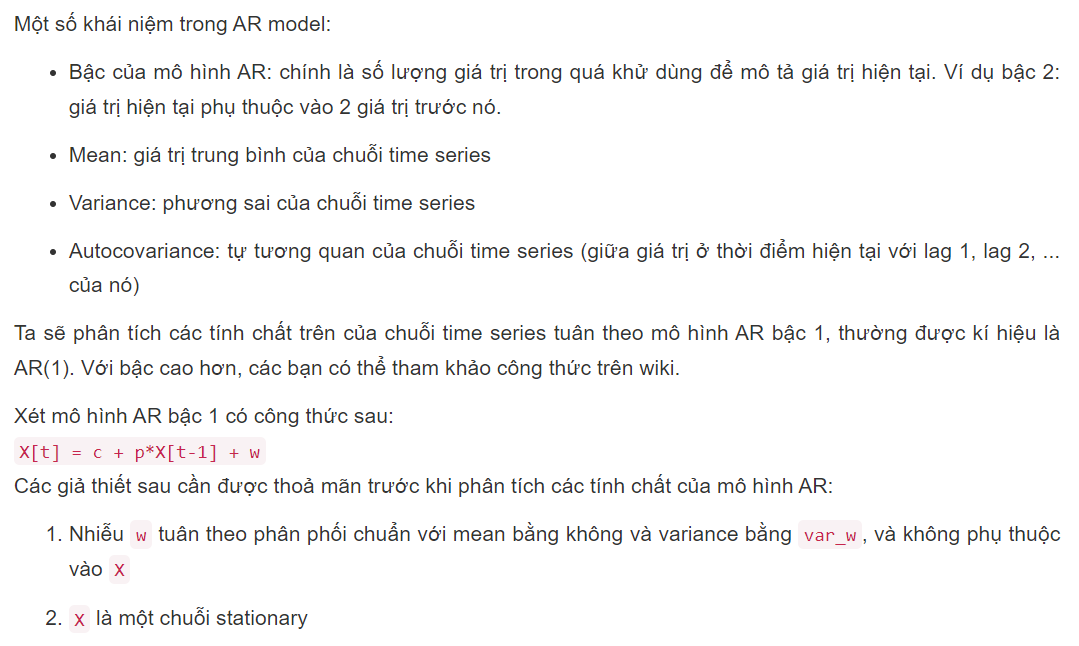

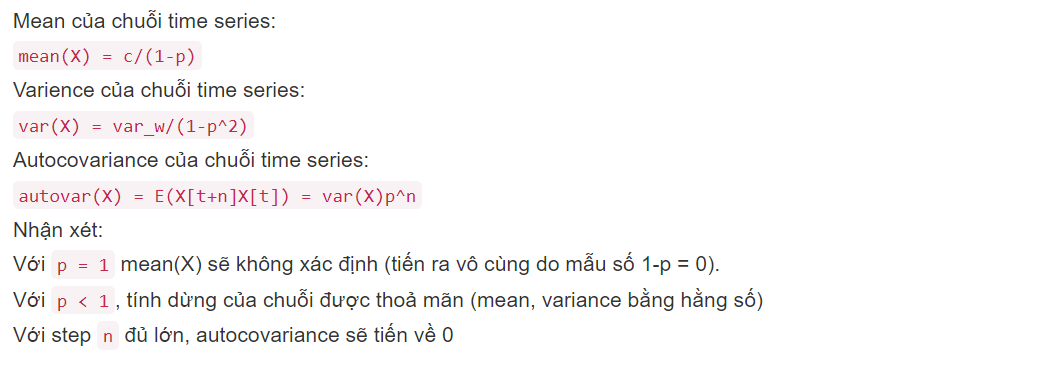

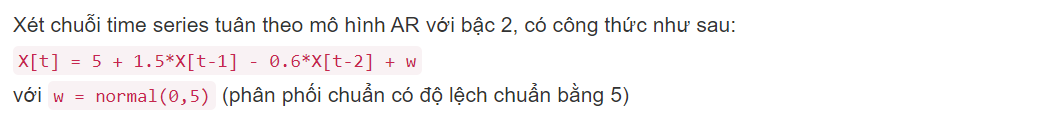

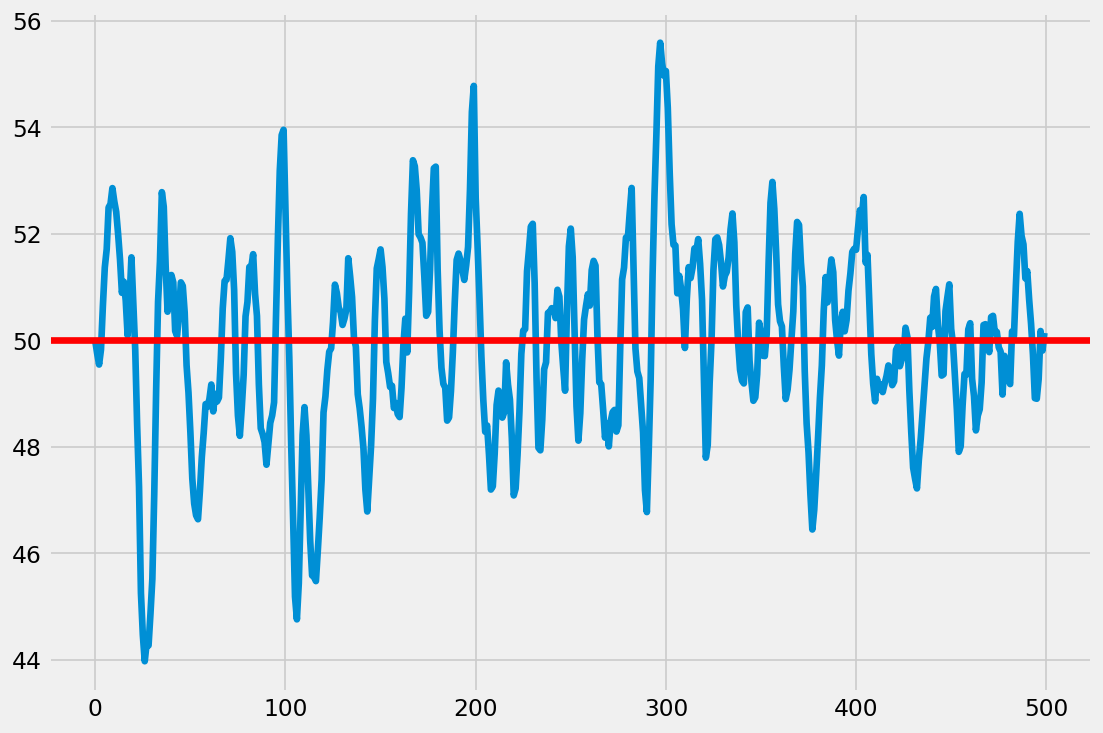

In [ ]:
p1 = 1.5
p2 = -0.6
c = 5
w = 0.5
T = 500
mean = c/(1-p1-p2)

ar_data = np.zeros(T)
ar_data[0] = mean + np.random.normal(0, w)
ar_data[1] = mean + np.random.normal(0, w)
for t in range(2, T):
    ar_data[t] = c + p1*ar_data[t-1] + p2*ar_data[t-2] + np.random.normal(0, w)


plt.plot(ar_data)
plt.axhline(y=mean, color='r', linestyle='-')

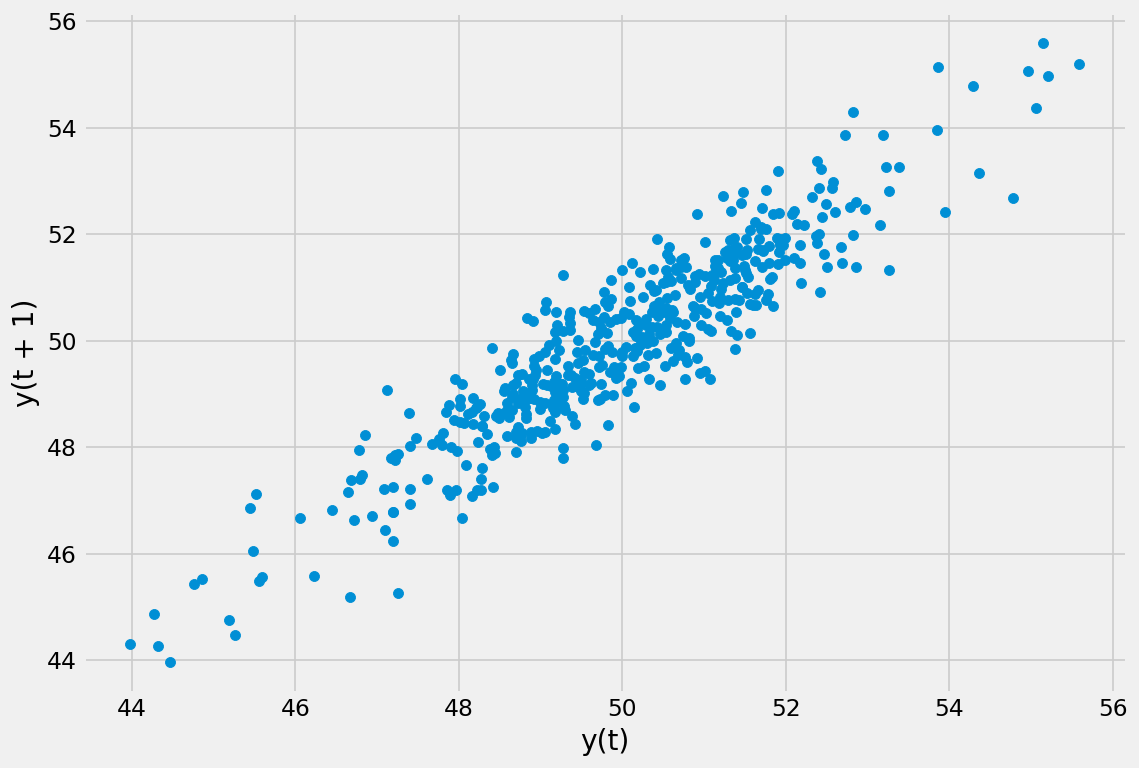

In [ ]:
# plot correlation
from pandas.plotting import lag_plot
lag_plot(pd.DataFrame(ar_data))

Dễ nhận thấy y[t+1] phụ thuộc vào y[t] theo quan hệ tuyến tính. Ta sẽ sử dụng thư viện statsmodels để tìm các tham số cho mô hình AR.


In [ ]:
model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 

Order of model:  2


In [ ]:
predicted_model = model.fit(maxlag=3)
print("Params of model: ", predicted_model.params)

Params of model:  [ 6.3101205   1.51308126 -0.6264491  -0.01287078]


In [ ]:
pred = predicted_model.predict(3, 300)
rmse = np.sqrt(mean_squared_error(ar_data[3:301], pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.550


In [ ]:
model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 
predicted_model = model.fit(maxlag=2)
print("Params of model: ", predicted_model.params)

pred = predicted_model.predict(2, 300)
rmse = np.sqrt(mean_squared_error(ar_data[2:301], pred))
print('Test RMSE: %.3f' % rmse)

Order of model:  2
Params of model:  [ 6.22952811  1.52148368 -0.64611283]
Test RMSE: 0.549


In [ ]:
model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 
predicted_model = model.fit(maxlag=4)
print("Params of model: ", predicted_model.params)
print(predicted_model.summary())

pred = predicted_model.predict(4, 300)
rmse = np.sqrt(mean_squared_error(ar_data[4:301], pred))
print('Test RMSE: %.3f' % rmse)


Order of model:  2
Params of model:  [ 6.09239844  1.5135735  -0.60470714 -0.06490561  0.03414132]
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                  500
Model:                          AR(4)   Log Likelihood                -387.286
Method:                          cmle   S.D. of innovations              0.528
Date:                Mon, 07 Nov 2022   AIC                             -1.252
Time:                        09:26:02   BIC                             -1.201
Sample:                             0   HQIC                            -1.232
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0924      0.780      7.810      0.000       4.564       7.621
L1.y           1.5136      0.045

Coefficients: [ 6.13206706 -0.12797557 -0.22202169 -0.17613201 -0.23070813 -0.11307161
 -0.27597379 -0.13393128 -0.26920597 -0.13883393 -0.28480354 -0.1135323
  0.79433223]
predicted=58.413894, expected=28.000000
predicted=-13.195322, expected=42.000000
predicted=27.551248, expected=11.000000
predicted=51.996432, expected=63.000000
predicted=82.428013, expected=87.000000
predicted=11.451185, expected=-16.000000
predicted=-106.577475, expected=-98.000000
predicted=-62.869247, expected=-47.000000
predicted=-51.069072, expected=-71.000000
predicted=51.037145, expected=42.000000
Test RMSE: 24.383


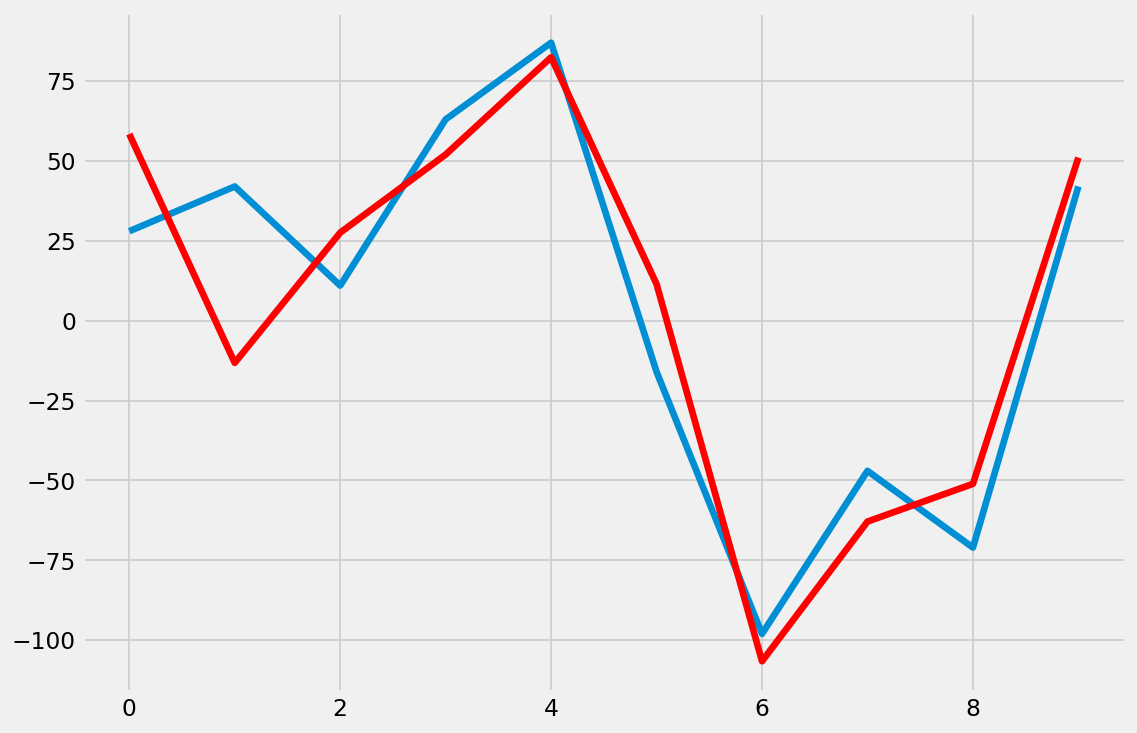

In [ ]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Moving Average

- In time series analysis, the moving-average model (MA model), also known as moving-average process, is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

- Together with the autoregressive (AR) model, the moving-average model is a special case and key component of the more general ARMA and ARIMA models of time series, which have a more complicated stochastic structure.



Mô hình MA là một phương pháp phổ biến dùng trong mô hình hoá chuỗi time series, nó cùng với phương pháp AutoRegressive sẽ tạo nên mô hình tổng quát hơn ARIMA. Về đặc điểm thì mô hình MA thể hiện rằng output (giá trị của chuỗi thời gian) sẽ phụ thuộc tuyến tính vào giá trị hiện tại cũng như các giá trị trong quá khứ của nhiễu (thành phần ngẫu nhiên, không thể dự đoán được)


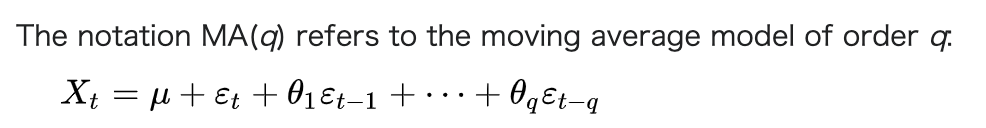

Xem lại mô hình AR để so sánh: 
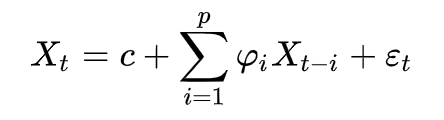

Ta thấy: 
trong khi mô hình AR thể hiện mối quan hệ **X[t]** phụ thuộc vào các giá trị chuỗi thời gian trước đó như **X[t-1], X[t-2]**, ...
thì mô hình MA thể hiện rằng **X[t]** phụ thuộc vào các giá trị nhiễu.
Thực ra trong mô hình AR cũng có thành phần nhiễu epsilon(t), nhưng mối quan hệ của **X[t]** với epsilon(t) trong hai mô hình là hoàn toàn khác nhau.

Trong mô hình AR, ảnh hưởng của thành phần nhiễu kéo dài đến vô cùng, như biểu diễn dưới đây:
- **X[t]** bị ảnh hưởng bởi **epsilon(t)**
- **X[t+1]** bị ảnh hưởng bởi **X[t]** nên **X[t+1]** bị ảnh hưởng bởi epsilon(t)
...

Lấy vị dụ như trong mô hình tài chính, ta mô hình hoá chỉ số thị trường chứng khoán, nếu **epsilon(t)** là tác động của khủng hoảng tài chính (tức là epsilon rất lớn) thì ảnh hưởng mà nó gây ra sẽ kéo dài rất lâu lên chỉ số thị trường.

Trong khi đó ở mô hình MA, ảnh hưởng của thành phần nhiễu chỉ kéo dài trong khoảng thời gian q (bằng với bậc của mô hình MA), lý do vì trong mô hình MA ta không có mối quan hệ phụ thuộc giữa **X[t]** và **X[t-1]**.

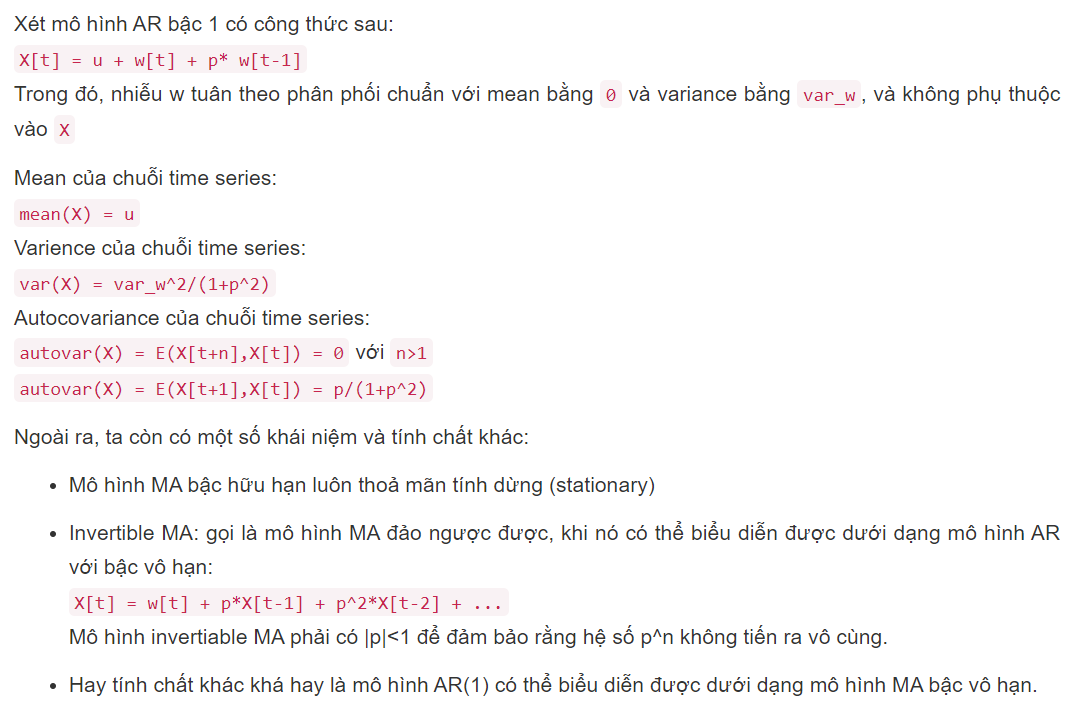

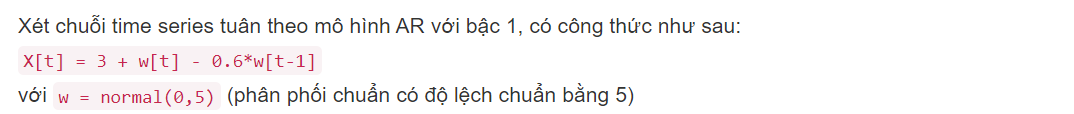

In [ ]:
from statsmodels.tsa.arima_model import ARMA

u = 3
p = -0.6
T = 500
mean = u
w = np.random.normal(loc=0, scale=1, size=500)
data = np.zeros(500)
data[0] = 3 + w[0]
for i in range(1,500):
    data[i] = 3 + w[i] - 0.6*w[i-1]

In [ ]:
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
print(model_fit.params)

[ 3.0140414  -0.64585474]


Như vậy các tham số predicted tương đối giống với tham số của mô hình thực tế (3, -0.6)

Coefficients: [ 2.47987527e+00  4.60536221e-02 -8.58837038e-02 -2.40404832e-01
 -2.32451886e-01  2.31150771e-02 -1.08286571e-01 -3.57070311e-03
 -2.45013797e-01 -2.20784486e-01 -6.42733521e-02  4.20638214e-02
  9.86466192e-01  2.79860457e+02]
predicted=18.925516, expected=28.000000
predicted=-2.289155, expected=42.000000
predicted=25.991545, expected=11.000000
predicted=31.922725, expected=63.000000
predicted=53.533345, expected=87.000000
predicted=-9.964578, expected=-16.000000
predicted=-32.389104, expected=-98.000000
predicted=-14.016777, expected=-47.000000
predicted=1.946716, expected=-71.000000
predicted=35.631593, expected=42.000000
Test RMSE: 38.917


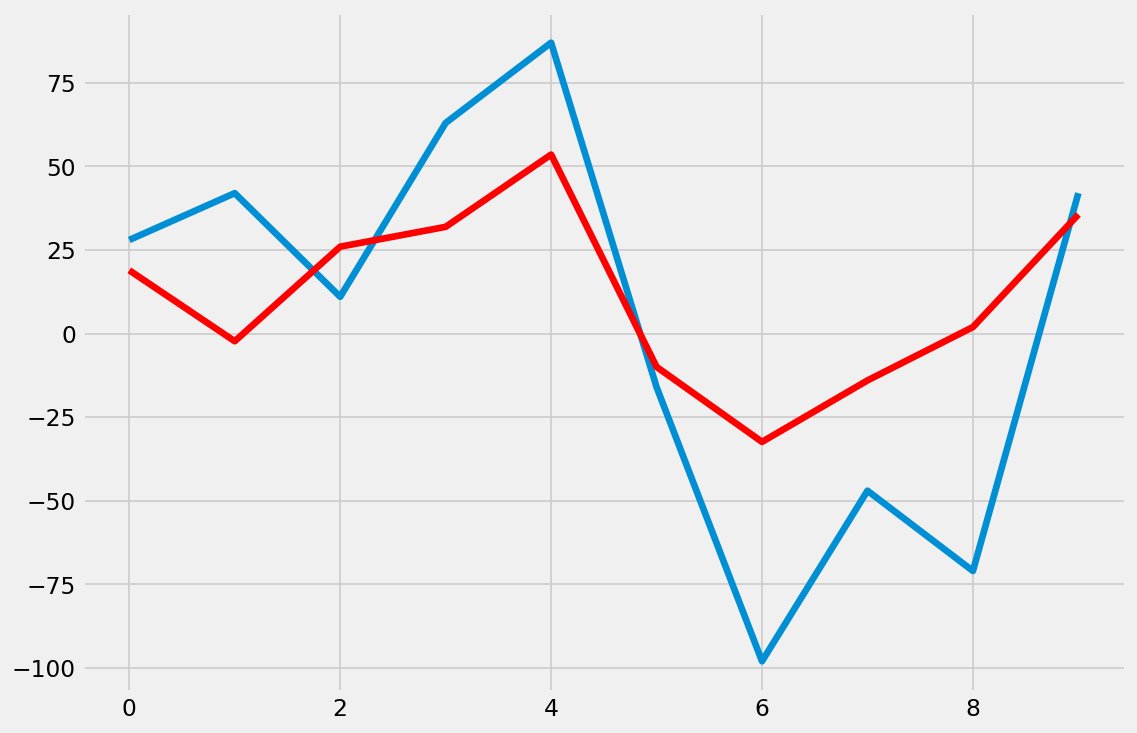

In [ ]:
# create and evaluate a MA 
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train MA
model = ARIMA(train, order=(0, 0, 12))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARMA model

Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

Coefficients: [ 2.50326673  1.03629739 -0.62286691 -0.94564457  0.39050973 -0.07826269
 -0.21536988  0.78265053 -0.93388287]
predicted=6.258268, expected=28.000000
predicted=-1.456712, expected=42.000000
predicted=28.380918, expected=11.000000
predicted=19.332831, expected=63.000000
predicted=18.454357, expected=87.000000
predicted=2.773743, expected=-16.000000
predicted=-7.151845, expected=-98.000000
predicted=-7.670772, expected=-47.000000
predicted=-2.026213, expected=-71.000000
predicted=4.146451, expected=42.000000
Test RMSE: 50.608


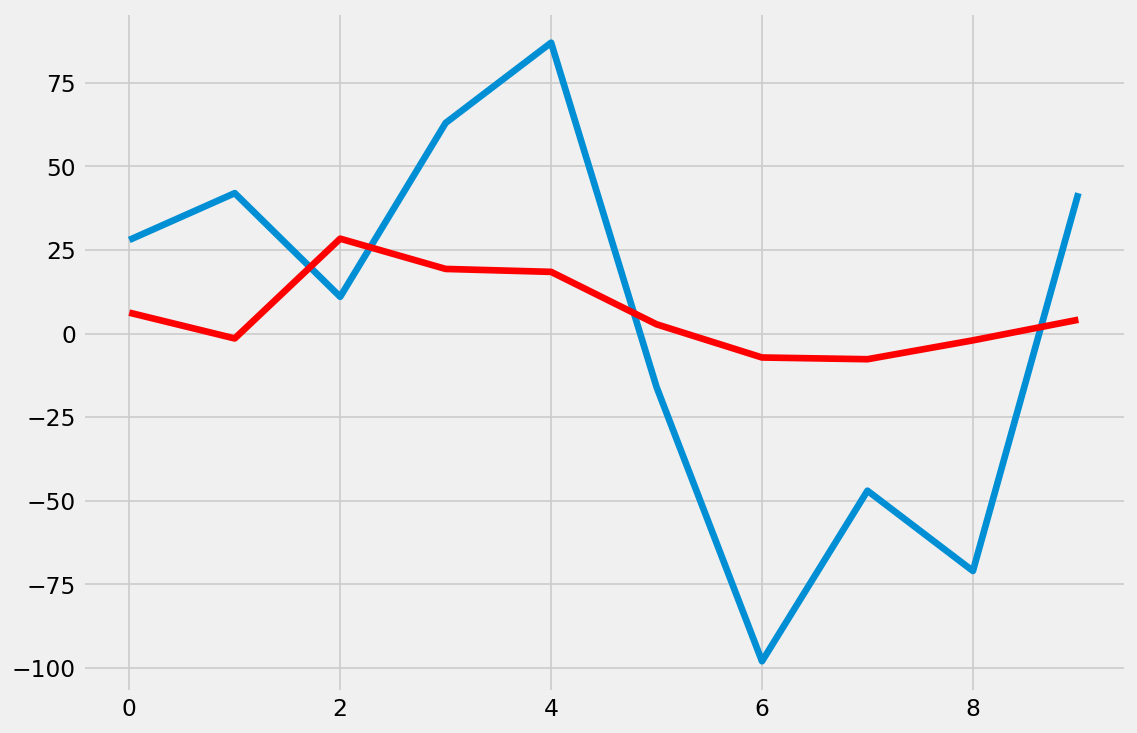

In [ ]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima_model import ARMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
model = ARMA(train, order=(2, 6))
model_fit = model.fit(disp=False)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARIMA model

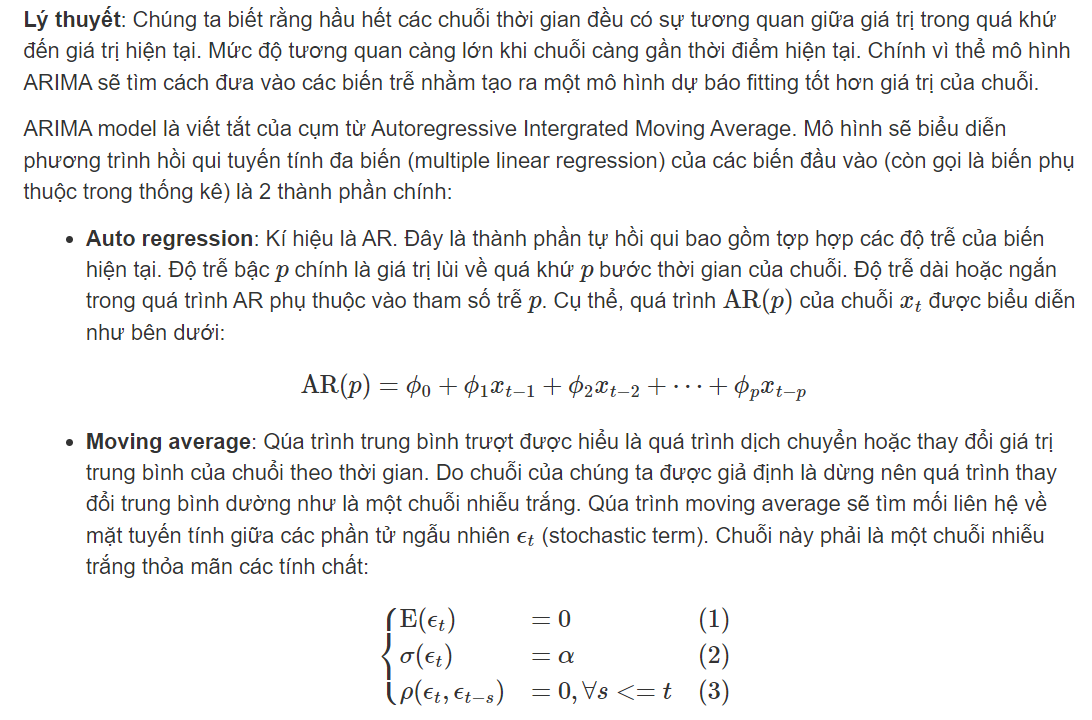

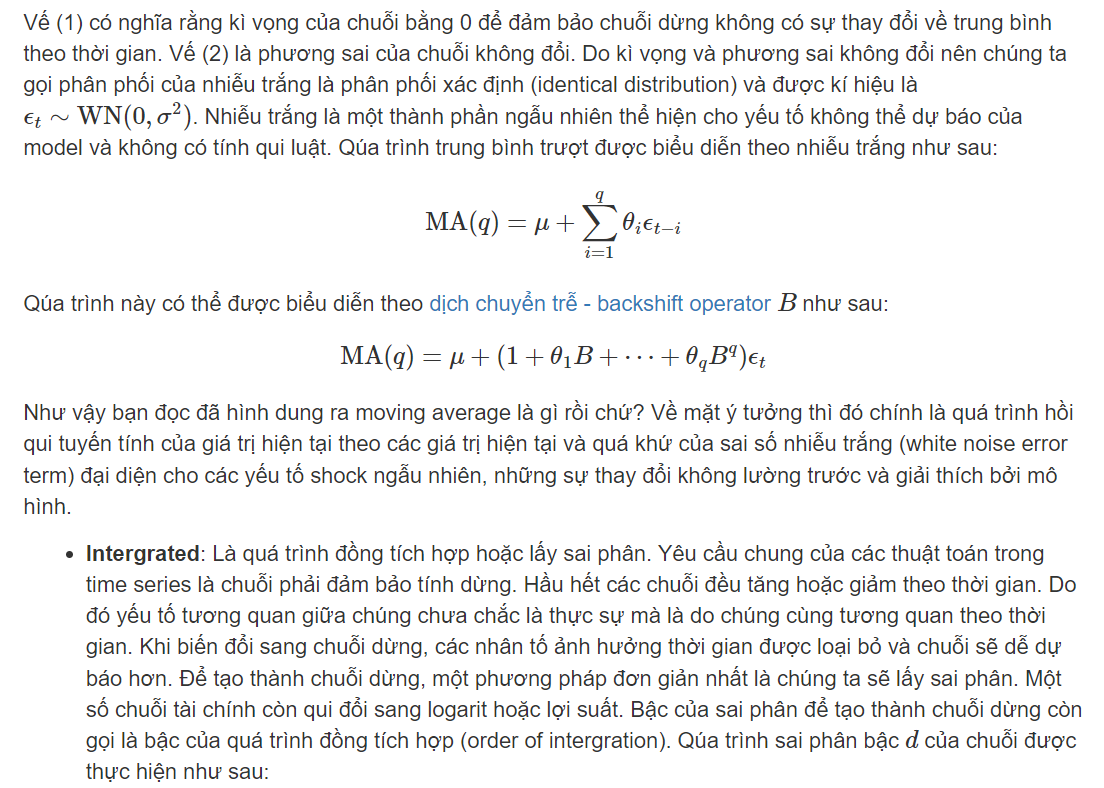

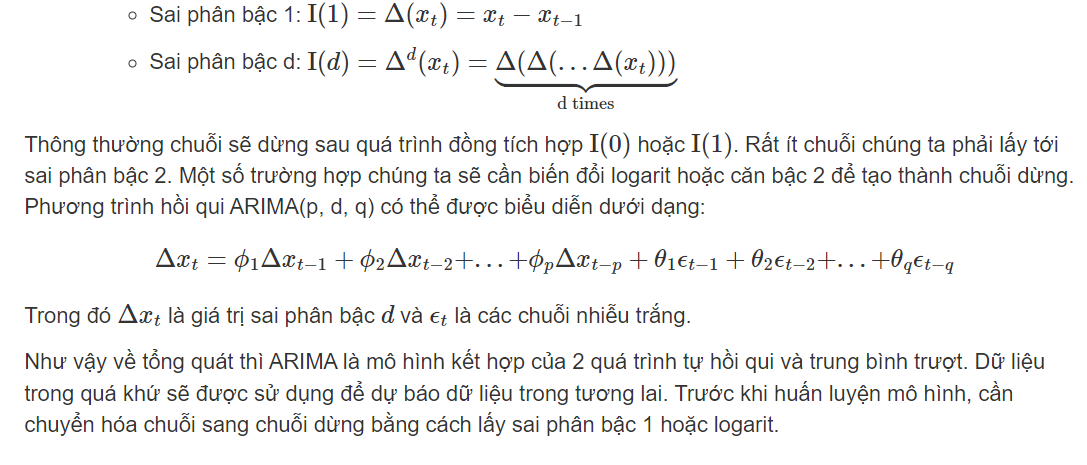

Coefficients: [ 2.50989948e+00  2.39868731e-01 -1.70824549e-01 -5.45107779e-01
 -2.06333729e-01 -2.65331072e-01  6.00696513e-01 -6.47121917e-01
 -4.75639425e-01  4.94544563e+02]
predicted=30.625335, expected=28.000000
predicted=-17.956854, expected=42.000000
predicted=-15.256696, expected=11.000000
predicted=31.892029, expected=63.000000
predicted=44.749915, expected=87.000000
predicted=17.307479, expected=-16.000000
predicted=-17.172683, expected=-98.000000
predicted=-27.764487, expected=-47.000000
predicted=-9.455986, expected=-71.000000
predicted=15.540395, expected=42.000000
ARIMA(3,0,5) --> AIC=1242.641664468706; BIC=1271.620062468215
Test RMSE: 44.209


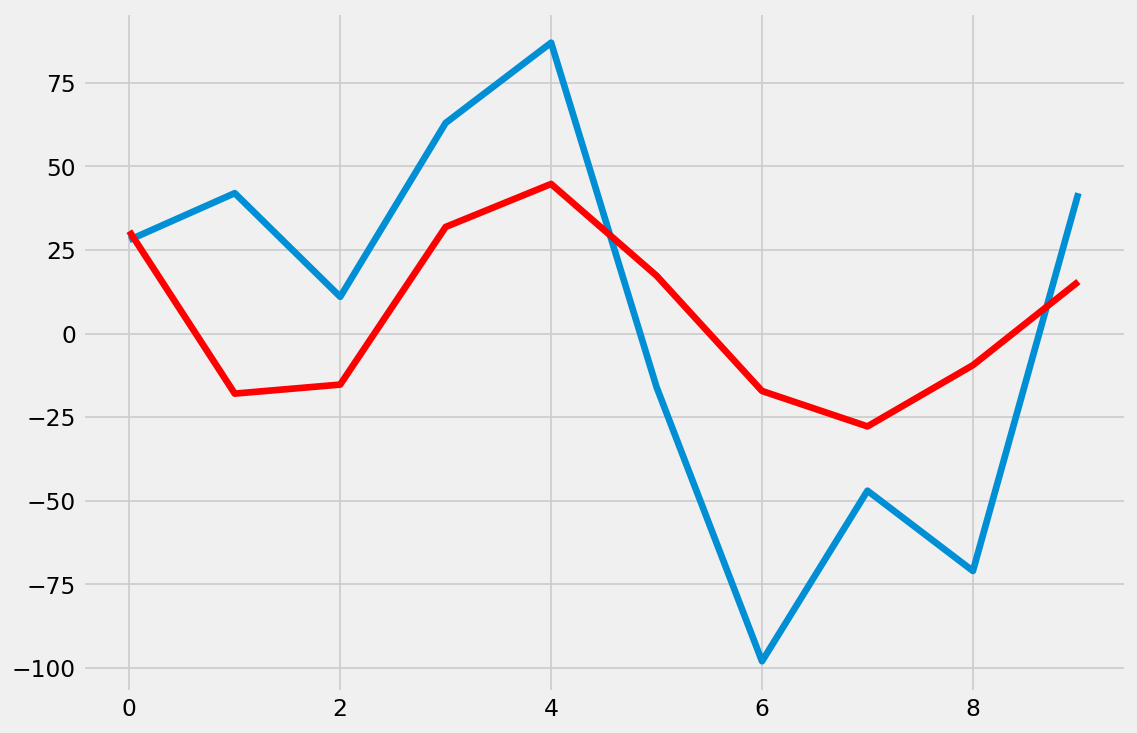

In [ ]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
dataset = df['#passengers_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]
order = (3, 0, 5)

# fit model
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 

model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
print('{} --> AIC={}; BIC={}'.format(model_name, model_fit.aic, model_fit.bic))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  134
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -611.321
Date:                Mon, 07 Nov 2022   AIC                           1242.642
Time:                        09:26:09   BIC                           1271.620
Sample:                             0   HQIC                          1254.418
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5099      0.124     20.211      0.000       2.266       2.753
ar.L1          0.2399      0.431      0.556      0.578      -0.605       1.085
ar.L2         -0.1708      0.361     -0.473      0.636      -0.878       0.536
ar.L3         -0.5451      0.328     -1.663      0.096      -1.188       0.097
ma.L1         -0.2063      0.474     -0.435      0.663      -1.135       0.722
ma.L2         -0.2653      0.485     -0.547      0.585      -1.217       0.686
ma.L3          0.6007      0.232      2.586      0.010       0.145       1.056
ma.L4         -0.6471      0.346     -1.869      0.062      -1.326       0.032
ma.L5         -0.4756      0.485     -0.980      0.327      -1.427       0.475
sigma2       494.5446    164.086      3.014      0.003     172.942     816.147
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.55   Prob(JB):                         0.81
Heteroskedasticity (H):               6.46   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AIC - Akaike Information Criteria 

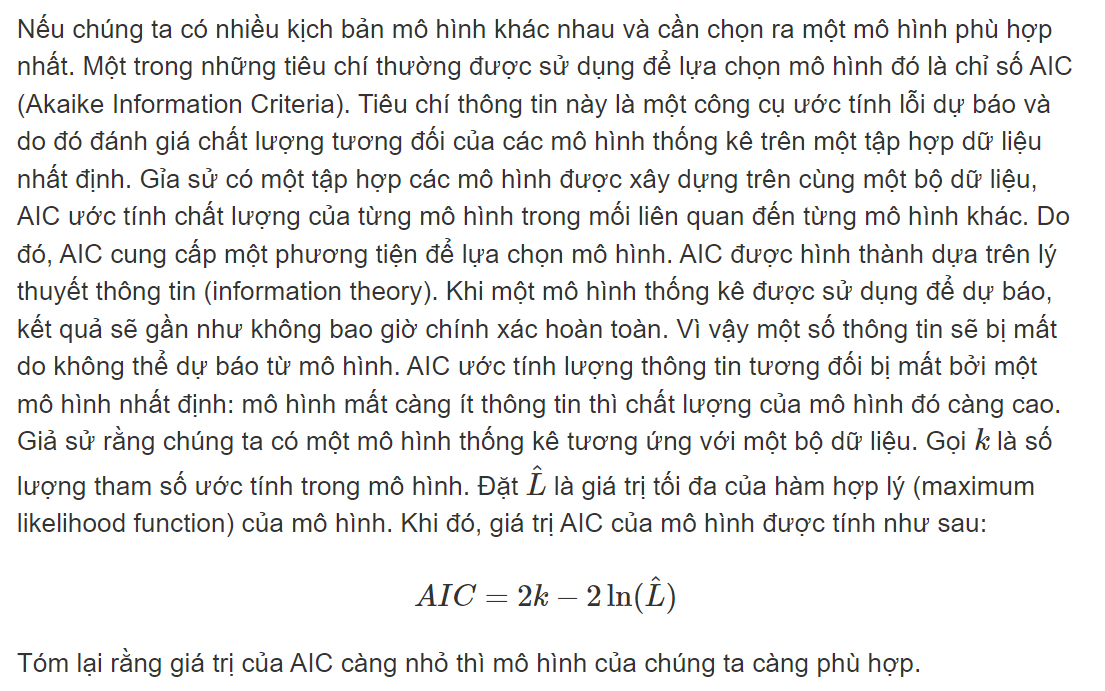

## Choice parameters

An ARIMA model is characterized by 3 terms: ARIMA(p, d, q)

- p is the order of the AR term
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term

- The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model







### How to find d

The purpose of differencing it to make the time series stationary.

- But you need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

So how to determine the right order of differencing?

- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

- In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.


**Sử dụng ADF test để kiểm tra. Nếu chuỗi là stationary thì d=0, còn nếu là chuỗi non-stationary thì có thể d=1 hoặc d=2**


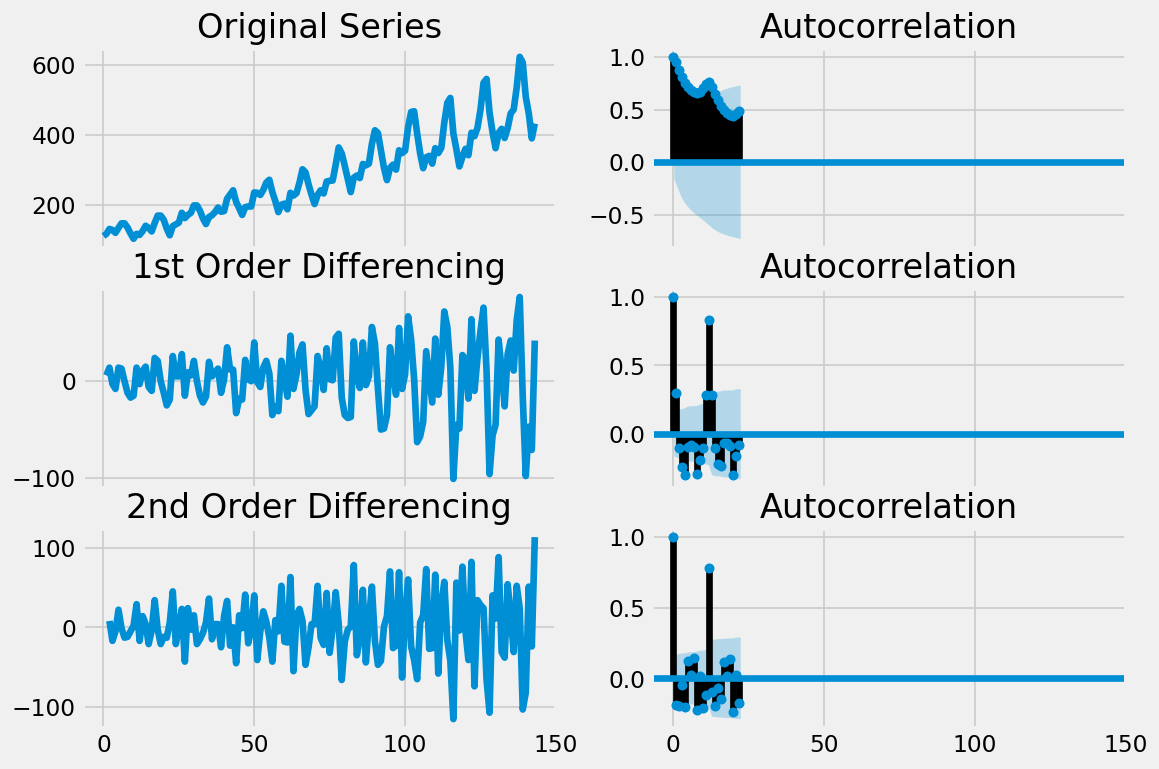

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import data
df = get_df()
df['value'] = df['#passengers']

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above series, the time series reaches stationarity with one orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, we should choice d = 1

### How to find p (AR)

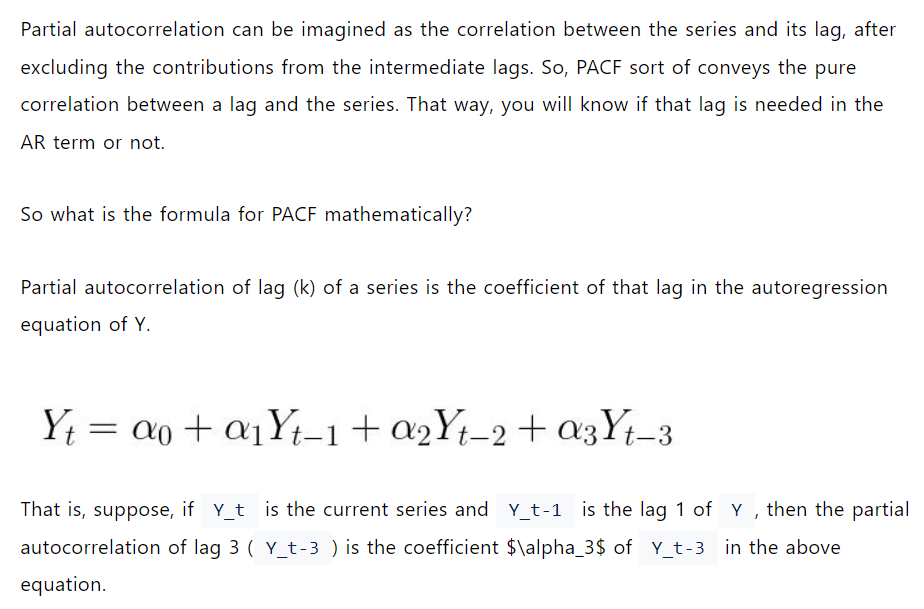

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

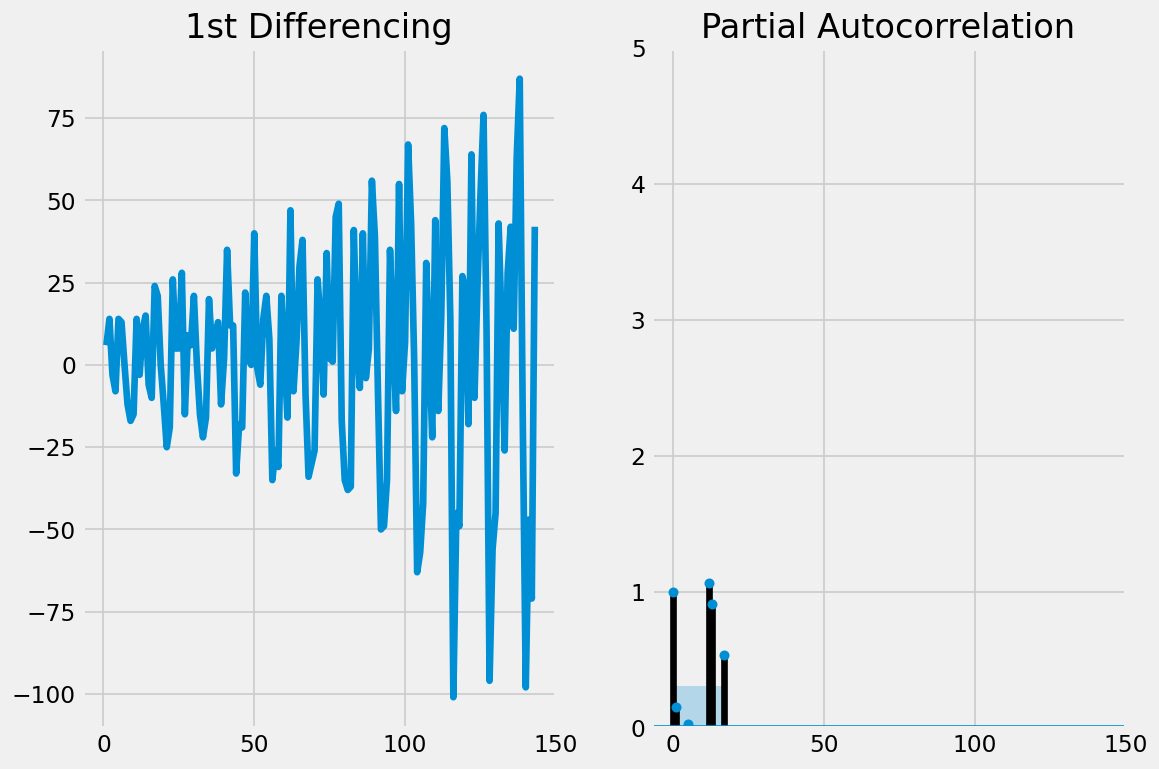

In [ ]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna()[:40], ax=axes[1])

temp = df.value.diff().dropna() 
plt.show()

**You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 12 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But we are going to use p = 1**

### How to find q (MA)

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.




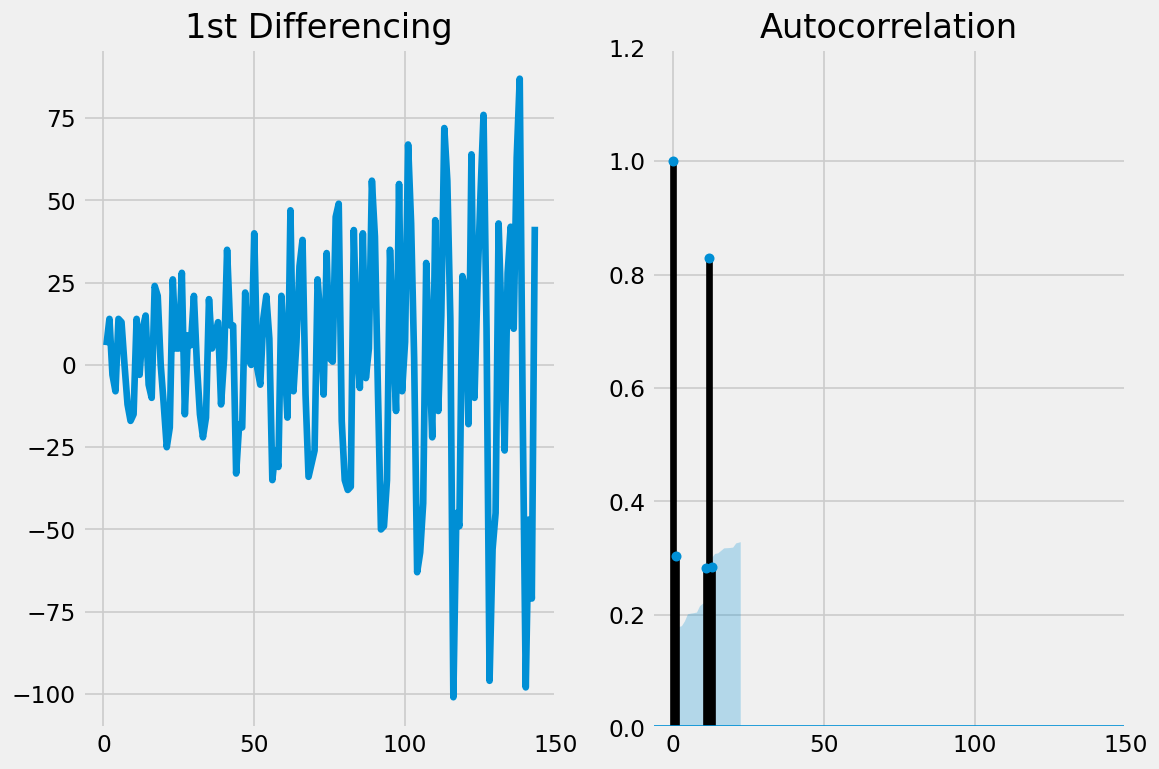

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])
plt.show()

**Couple of lags are well above the significance line. So, let’s tentatively fix q as 1. When in doubt, go with the simpler model that sufficiently explains the Y.**

# Bài tập: 

Chọn 1 bộ dữ liệu time-series bất kì trong đây [link text](https://github.com/thieu1995/csv-files), và lấy ra một cột time-series, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models. 

Với yêu cầu các models bên trên phải được tối ưu hóa tham số mô hình, các mô hình được so sánh dựa trên giá trị AIC. Model nào có giá trị AIC càng nhỏ thì càng tốt.
Sau đó so sánh kêt quả của 4 models đã được tối ưu tham số từ 4 mô hình bên trên.



# **References**

1. https://blog.vietnamlab.vn/time-series-moving-average-model/
2. https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
3. https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
4. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
5. https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook
6. https://www.machinelearningplus.com/time-series/time-series-analysis-python/
7. https://otexts.com/fpp2/MA.html
8. https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
9. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
10. https://www.youtube.com/watch?v=FsroWpkUuYI&list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s&index=1&ab_channel=AricLaBarr
